# FLAML: Fast and Lightweight AutoML

FLAML (Fast and Lightweight AutoML) is an open-source library designed to make automated machine learning accessible and efficient. It focuses on providing a user-friendly interface for model selection and hyperparameter tuning, enabling users to build machine learning models quickly and effectively.

## Key Features

- **Ease of Use**: FLAML allows users to perform AutoML tasks with minimal configuration, making it suitable for both beginners and experienced data scientists.
  
- **Efficiency**: The library is optimized for speed and memory usage, allowing it to search for the best model configurations without excessive resource consumption.
  
- **Handling of Categorical Data**: FLAML can automatically handle categorical features, requiring no extensive preprocessing such as one-hot encoding or label encoding.

- **Flexible Task Support**: It supports various machine learning tasks, including regression, classification, and time-series forecasting.

- **Hyperparameter Tuning**: FLAML includes advanced techniques for hyperparameter optimization, ensuring that the selected model performs at its best.

## Installation

To install FLAML, use pip:

```bash
pip install flaml
```

In [1]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 5.5 MB/s eta 0:00:00


In [2]:
import pandas as pd 
import  numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from flaml import AutoML

import warnings
warnings.filterwarnings('ignore')


2024-10-15 00:42:52,905	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-15 00:42:53,682	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [3]:
df = pd.read_csv('/kaggle/input/laptop-prices/laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
cat_df = df.select_dtypes(include='object')
for i in (cat_df):
    print(f'number of uniques values in {i} = ',cat_df[i].nunique())

number of uniques values in Company =  19
number of uniques values in Product =  618
number of uniques values in TypeName =  6
number of uniques values in OS =  9
number of uniques values in Screen =  4
number of uniques values in Touchscreen =  2
number of uniques values in IPSpanel =  2
number of uniques values in RetinaDisplay =  2
number of uniques values in CPU_company =  3
number of uniques values in CPU_model =  93
number of uniques values in PrimaryStorageType =  4
number of uniques values in SecondaryStorageType =  4
number of uniques values in GPU_company =  4
number of uniques values in GPU_model =  110


In [6]:
print(df.head())
print(df.describe())
print(df.columns)

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [7]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [8]:
# split data into train and test set 
features = df.drop(columns='Price_euros',axis=1)
target = df['Price_euros']

# # Convert categorical variables using Label Encoder
# # Initialize LabelEncoder
# label_encoders = {}
# for column in features.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     features[column] = le.fit_transform(features[column])
#     label_encoders[column] = le  # Store the encoder for future use if needed


x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2)

# make two set one for [train set], another for [test set]
train_data = pd.concat([x_train,y_train],axis=1)
test_data = pd.concat([x_test,y_test],axis=1)

In [9]:
# model = TPOTRegressor(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# model.fit(x_train, y_train)
automl = AutoML()
automl.fit(x_train, y_train, task="regression", time_budget=60)


[flaml.automl.logger: 10-15 00:43:04] {1728} INFO - task = regression
[flaml.automl.logger: 10-15 00:43:04] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-15 00:43:04] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-15 00:43:04] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost']
[flaml.automl.logger: 10-15 00:43:04] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-15 00:43:04] {2393} INFO - Estimated sufficient time budget=2044s. Estimated necessary time budget=18s.
[flaml.automl.logger: 10-15 00:43:04] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.6855,	best estimator lgbm's best error=0.6855
[flaml.automl.logger: 10-15 00:43:04] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-15 00:43:04] {2442} INFO -  at 0.6s,	estimator lgbm's best error=0.6855,	best estimator lgbm's best error=0.6855
[flaml.automl.logger: 10-15 00:43

In [10]:
# Evaluate the model
y_pred = automl.predict(x_test)
print("Predictions:", y_pred)

# Optionally, you can check the best model
print("Best model:", automl.best_estimator)

Predictions: [ 455.64520241 1220.33531178 1332.37307501 1962.28817205  951.47597962
 1425.85661748  916.37526367  932.38902511 1267.76706076 1124.45022871
 1887.72325458  543.25856083  674.14346526  790.97228655  789.85961225
  480.45981096 1205.36701945  982.03139895  681.49765006 2560.72444347
  629.57625202  428.50364412 1214.09652501  765.44475475 1996.79468617
  937.76135641  406.12294155 1361.3526727  1027.50074205 1400.80618305
  801.68032684  930.60693646 1029.70093857  760.89369331  978.76396351
  723.95820633  953.55248301  717.78214567  583.89270067  356.34346152
 1471.0918899   315.0691842  1370.09363986 1018.64431121  510.24813826
  388.20467676  482.31004587  741.96299458  564.17009111 1206.07872902
  929.13148989  785.61971985  977.65354342  383.90482711 1144.32955073
 1068.44661376  941.72904239  598.57916671  550.52020049 1204.33455958
 1282.62900858  389.2898217   572.87815087 1065.68644466  727.0321062
  719.08198336 1178.82090902 1203.79322752  843.14585413 1270.260

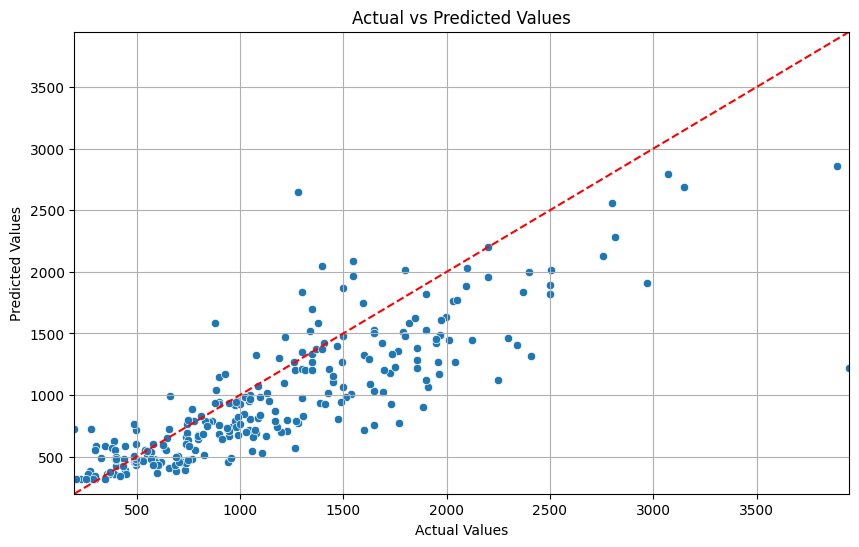

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

## Explanation of the Plots

### Scatter Plot
The scatter plot shows the actual values on the x-axis and the predicted values on the y-axis. Each point represents an individual prediction.

### Diagonal Line
The red dashed line represents the ideal scenario where predicted values equal actual values. Points close to this line indicate better predictions, while points further away indicate larger prediction errors.

### Axes Labels and Title
The plot includes labels for both axes and a title for clarity, helping to communicate the relationship between actual and predicted values effectively.


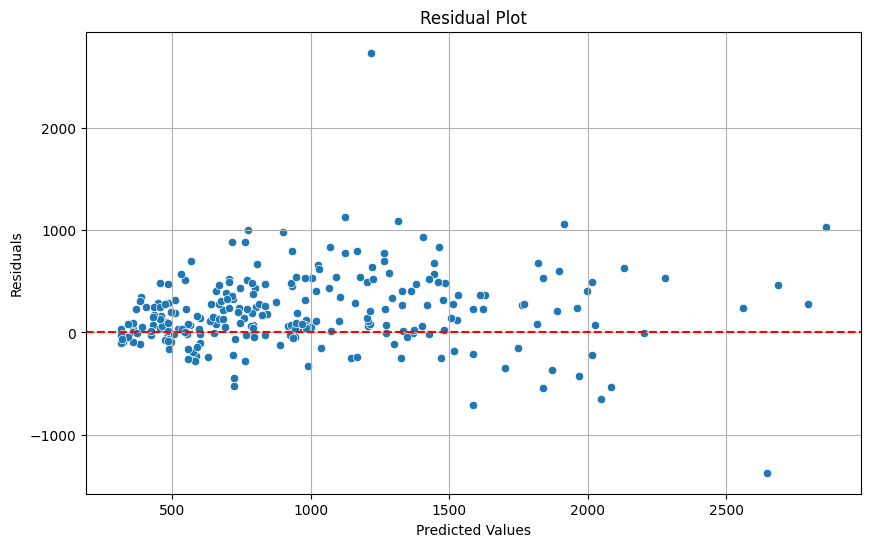

In [12]:
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

## Explanation of the Plots

### Residual Plot
The residual plot shows the residuals (errors) on the y-axis against the predicted values (or actual values) on the x-axis. Each point represents the difference between the actual and predicted values for a given observation.

- **Red Horizontal Line**: The red dashed line at zero serves as a reference. Ideally, the residuals should be randomly distributed around this line, indicating that the model's predictions are unbiased.

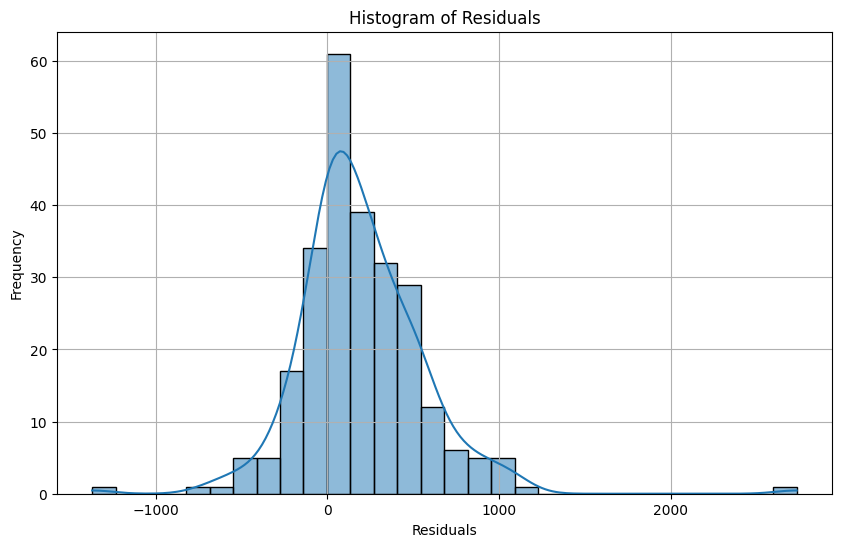

In [13]:
# Histogram of Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)  # KDE adds a kernel density estimate
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid()
plt.show()

## Explanation of the Plots


### Histogram of Residuals
The histogram displays the distribution of residuals (errors) on the x-axis and their frequency on the y-axis.

- **KDE (Kernel Density Estimate)**: The curve overlaid on the histogram shows the estimated probability density of the residuals. 
- **Ideal Distribution**: A normal distribution centered around zero indicates that the model's errors are consistent and not biased in one direction. Deviations from this can signal issues with the model.

